# Assignment 7
### Do any five.

In [5]:
import os
if os.getcwd().split('/')[-1] != 'data':
    os.chdir('../data')

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)

<Axes: xlabel='price', ylabel='Proportion'>

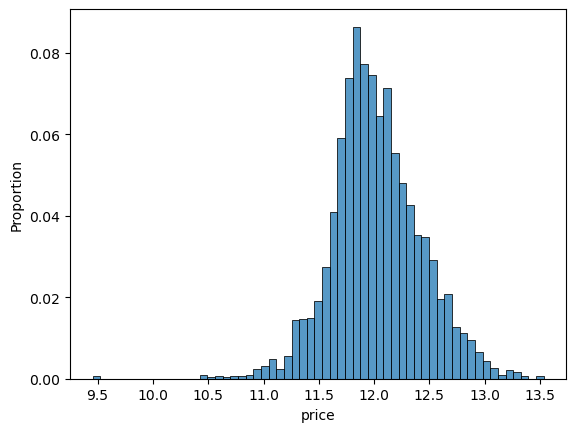

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp 
import matplotlib.pyplot as plt
df = pd.read_csv('ames_prices.csv')
y = np.log( df['price'] )
sns.histplot(y,stat='proportion')

I log-transformed the price because it had a large tail. The log-transformed KDE of price seems normally distributed. Thus, I'll select a normal distribution over the log-transformed variable.

- Derive the density for this distribution.

Normal Density:
$$
f( y) = \dfrac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\left( \frac{y-\mu}{\sigma} \right)^2}
$$

I'm assuming that the normal PDF is our starting point for the derivation. Since I chose a normal distribution, there are no steps in the derivation.

- Write out the likelihood.

Likelihood:
$$
L(\mu, \sigma) = \prod_{i=1}^n \dfrac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2}.
$$

- Maximize the likelihood. What is the MLE?

Take logs to turn the multiplication into addition:
$$
\log L(\mu, \sigma) = \log (\prod_{i=1}^n \dfrac{1}{\sqrt{2\pi} \sigma}e^{-\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2}).
$$

$$
= \ell(\mu, \sigma) = \sum_{i=1}^n \log \left( \dfrac{1}{\sqrt{2\pi}}\right) + \log(\frac{1}{\sigma}) + \log e^{-\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2}
$$

$$
= \sum_{i=1}^n \log \left( \dfrac{1}{\sqrt{2\pi}}\right) - \log(\sigma) -\frac{1}{2}\left( \frac{y_i-\mu}{\sigma} \right)^2
$$

Then, take the derivative and set equal to zero to find the maximum likelihood:

For $\mu$:
$$
\dfrac{\partial \ell(\mu,\sigma)}{\partial \mu} = \sum_{i=1}^n  \frac{y_i-\mu}{\sigma^2} = 0
$$

$$
\frac{\sum_{i=1}^n (y_i-\mu)}{\sigma^2} = 0
$$

$$
\sum_{i=1}^n y_i- n * \mu = 0 * \sigma^2
$$

$$
n * \mu = \sum_{i=1}^n y_i
$$

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n y_i
$$

For $\sigma$:
$$
\dfrac{\partial \ell(\mu,\sigma)}{\partial \sigma} = \sum_{i=1}^n  \frac{-1}{\sigma} +  \frac{(y_i-\mu)^2}{\sigma^3} = 0
$$

$$
\frac{-n}{\sigma} + \frac{\sum_{i=1}^n (y_i-\mu)^2}{\sigma^3} = 0
$$

$$
n * \sigma^2 = \sum_{i=1}^n (y_i-\mu)^2
$$

$$
\hat{\sigma} = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{\mu})^2 }
$$


- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.

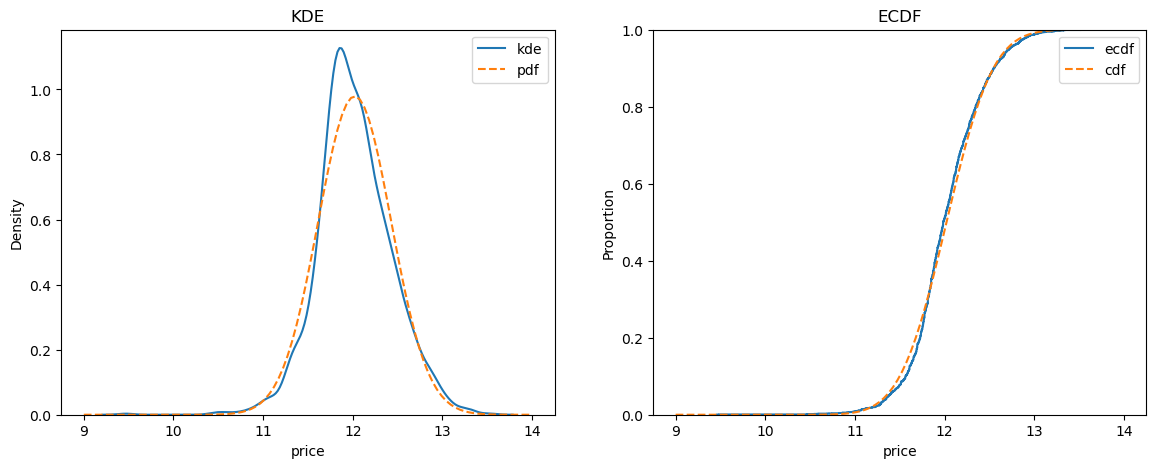

In [ ]:
mu_hat = np.mean(y)
sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )
grid = np.linspace(9,14,100)
pdf = sp.stats.norm.pdf(grid,loc=mu_hat,scale=sigma_hat)
cdf = sp.stats.norm.cdf(grid,loc=mu_hat,scale=sigma_hat)
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

There is some abnormality at the peak of the KDE that deviates from our PDF, and because of that abnormality, our PDF is shifted slightly to the right of the KDE. The KDE has a left skew, which throws off our PDF. For the most part, it fits well. The ECDF tells the same story in a different format.

- Bootstrap the sampling density/distribution of your parameters.

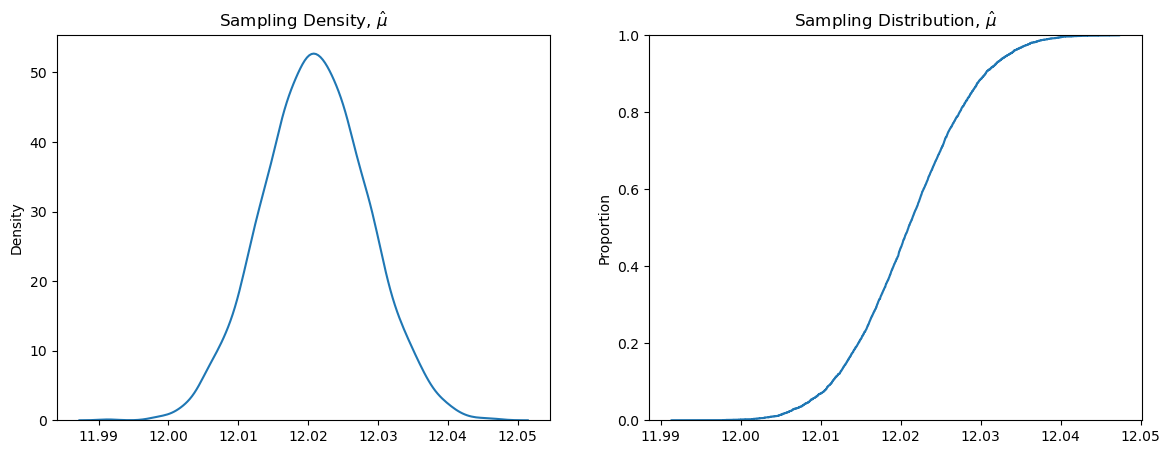

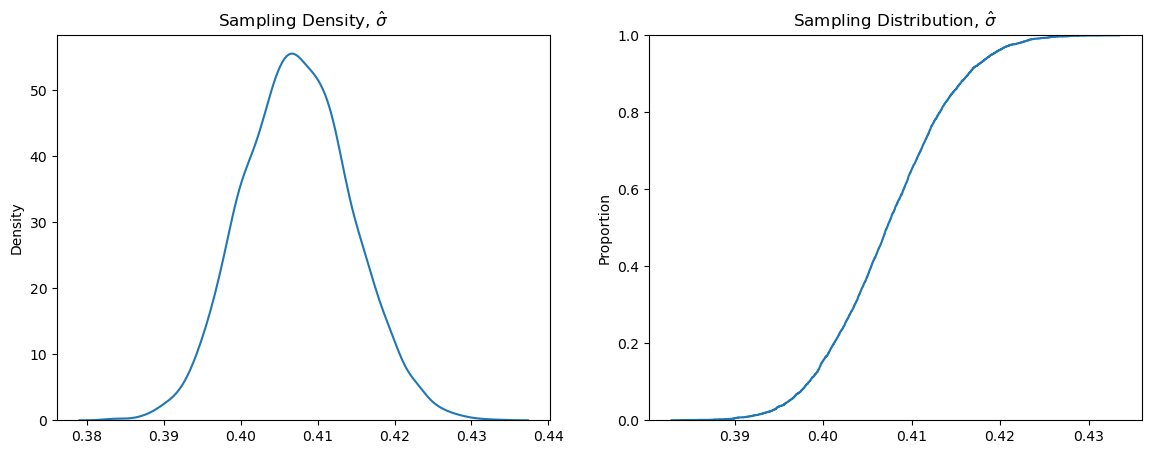

In [ ]:
def mle(y):
    mu_hat = np.mean(y)
    sigma_hat = np.sqrt( np.mean( (y-mu_hat)**2 ) )
    return mu_hat, sigma_hat
S = 5000
sample = [ mle(y.sample(frac=1.0,replace=True)) for s in range(S)]

mu_hat_sample = [ row[0] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=mu_hat_sample,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\mu}$')
sns.ecdfplot(x=mu_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\mu}$')
plt.show()

sigma_hat_samples = [ row[1] for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sigma_hat_samples,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\sigma}$')
sns.ecdfplot(x=sigma_hat_samples,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\sigma}$')
plt.show()